<a href="https://colab.research.google.com/github/TawfiqImamRafi/mHealth-framework-accuracy/blob/main/mhealth_framework_Impurity_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns

In [14]:
df = pd.read_csv('/content/drive/MyDrive/cardio_train.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
df.shape

(70000, 13)

**Checking empty values/null values from our dataset**

In [ ]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
years          0
dtype: int64

**After cleaning the dataset, the following program will show the first severals rows from our loaded dataset**

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Now, Counting on the following dataset of people having cardio vascular disease and not having cardio disease**

In [ ]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

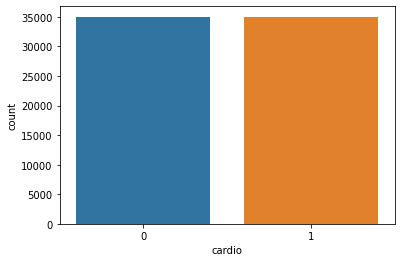

In [ ]:
sns.countplot(df['cardio'])

*So, the dataset we are using is almost balanced with number of patients having a cardio disease and not having it*

**Making a new colomn "age" from our dataset that would help us to see people having cardio disease of different ages**

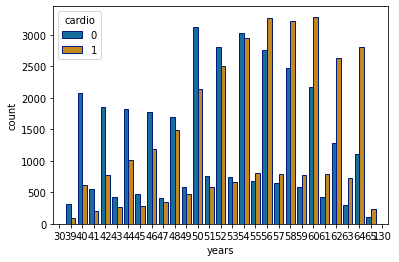

In [ ]:
df['years']=(df['age'] / 365).round(0)
df['years']=pd.to_numeric(df['years'], downcast='integer')

#visualizing the data
sns.countplot(x='years',hue='cardio',data=df,palette='colorblind' , edgecolor=sns.color_palette('dark',n_colors=1))

*Here, 0 means people not having cardio disease and 1 means people having a cardio disease*

**The following program will show us the correlations of the colomns of our cardio disease dataset**

In [ ]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.002970,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.002566
age,0.002970,1.000000,-0.022776,-0.080905,0.053367,0.020649,0.017526,0.153701,0.098209,-0.047712,-0.029800,-0.009590,0.236939,0.999094
gender,0.003502,-0.022776,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.022982
height,-0.003038,-0.080905,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.080845
weight,-0.001830,0.053367,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053343
ap_hi,0.003356,0.020649,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020678
ap_lo,-0.002529,0.017526,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017632
cholesterol,0.006106,0.153701,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.153661
gluc,0.002467,0.098209,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098101
smoke,-0.003699,-0.047712,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047962


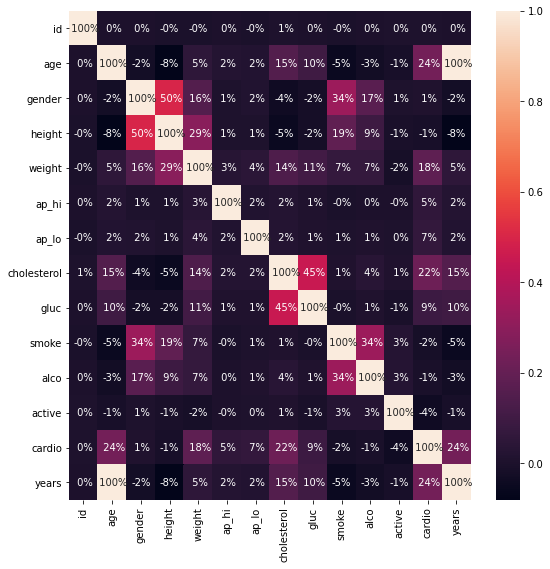

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, fmt=' .0%')

In [ ]:
def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))


# let's do two quick examples.
print('impurity using entropy on age column:', compute_impurity(df['age'], 'entropy'))
print('impurity using gini index on age column:', compute_impurity(df['age'], 'gini'))


impurity using entropy on age column: 12.632
impurity using gini index on age column: 1.0


In [ ]:
print('impurity using entropy on id column:', compute_impurity(df['id'], 'entropy'))
print('impurity using gini index on id column:', compute_impurity(df['id'], 'gini'))

impurity using entropy on id column: 16.095
impurity using gini index on id column: 1.0


In [ ]:
print('impurity using entropy on cholesterol column:', compute_impurity(df['cholesterol'], 'entropy'))
print('impurity using gini index on cholesterol column:', compute_impurity(df['cholesterol'], 'gini'))

impurity using entropy on cholesterol column: 1.064
impurity using gini index on cholesterol column: 0.408


In [ ]:
print('impurity using entropy on gender column:', compute_impurity(df['gender'], 'entropy'))
print('impurity using gini index on gender column:', compute_impurity(df['gender'], 'gini'))

impurity using entropy on gender column: 0.934
impurity using gini index on gender column: 0.455


In [ ]:
print('impurity using entropy on height column:', compute_impurity(df['height'], 'entropy'))
print('impurity using gini index on height column:', compute_impurity(df['height'], 'gini'))

impurity using entropy on height column: 4.931
impurity using gini index on height column: 0.959


In [ ]:
print('impurity using entropy on weight column:', compute_impurity(df['weight'], 'entropy'))
print('impurity using gini index on weight column:', compute_impurity(df['weight'], 'gini'))

impurity using entropy on weight column: 5.743
impurity using gini index on weight column: 0.975


In [ ]:
print('impurity using entropy on ap_hi column:', compute_impurity(df['ap_hi'], 'entropy'))
print('impurity using gini index on ap_hi column:', compute_impurity(df['ap_hi'], 'gini'))

impurity using entropy on ap_hi column: 2.907
impurity using gini index on ap_hi column: 0.786


In [ ]:
print('impurity using entropy on ap_lo column:', compute_impurity(df['ap_lo'], 'entropy'))
print('impurity using gini index on ap_lo column:', compute_impurity(df['ap_lo'], 'gini'))

impurity using entropy on ap_lo column: 2.286
impurity using gini index on ap_lo column: 0.684


In [ ]:
print('impurity using entropy on gluc column:', compute_impurity(df['gluc'], 'entropy'))
print('impurity using gini index on gluc column:', compute_impurity(df['gluc'], 'gini'))

impurity using entropy on gluc column: 0.761
impurity using gini index on gluc column: 0.267


In [ ]:
print('impurity using entropy on smoke column:', compute_impurity(df['smoke'], 'entropy'))
print('impurity using gini index on smoke column:', compute_impurity(df['smoke'], 'gini'))

impurity using entropy on smoke column: 0.43
impurity using gini index on smoke column: 0.161


In [ ]:
print('impurity using entropy on alco column:', compute_impurity(df['alco'], 'entropy'))
print('impurity using gini index on alco column:', compute_impurity(df['alco'], 'gini'))

impurity using entropy on alco column: 0.302
impurity using gini index on alco column: 0.102


In [ ]:
print('impurity using entropy on active column:', compute_impurity(df['active'], 'entropy'))
print('impurity using gini index on active column:', compute_impurity(df['active'], 'gini'))

impurity using entropy on active column: 0.714
impurity using gini index on active column: 0.315


In [ ]:
print('impurity using entropy on cardio column:', compute_impurity(df['cardio'], 'entropy'))
print('impurity using gini index on cardio column:', compute_impurity(df['cardio'], 'gini'))

impurity using entropy on cardio column: 1.0
impurity using gini index on cardio column: 0.5


the column 'Alco' has the lowest impurity. 10 least impure attributes: gender, gluc, smoke, alco, active, cardio, cholesterol. worst 3: id, age, height, weight, ap_hi, ap_lo. We will take the 8 least impure attribute to measure accuracy once more.

In [ ]:
df['alco'].value_counts()

0    66236
1     3764
Name: alco, dtype: int64

**Droping 4 most impure features**

In [ ]:
dt2 = df
dt2 = dt2.drop(columns=['id', 'age', 'height', 'weight'])
dt2.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,2,110,80,1,1,0,0,1,0
1,1,140,90,3,1,0,0,1,1
2,1,130,70,3,1,0,0,0,1
3,2,150,100,1,1,0,0,1,1
4,1,100,60,1,1,0,0,0,0


**Spliting the data into feature data and target data**

In [ ]:
X = dt2.iloc[:, :-1].values
y = dt2.iloc[:, -1].values

**Spliting the data, into 75% training data and 25% testing data set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state = 1)

Now here we will be using a machine learning algorithm (Random Forest Classifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

**Test the models accuracy on the training data set**

In [ ]:
classifiers=[]
accuracies=[]
trainAcc=[]
model = forest
trainAcc.append(model.score(X_train, y_train))
model.score(X_train, y_train)

0.7450666666666667

*Accuracy for the model's training dataset 74.50%*

**Test the models accuracy on the test data set**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score

In [ ]:
predictions = model.predict(X_test)
print(len(predictions),len(y_test))
score = accuracy_score(y_test , predictions)
print(score)
classifiers.append('Random Forest')
accuracies.append(score)

17500 17500
0.7216


*Accuracy for the model's test dataset 72%*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
trainAcc.append(knn.score(X_train, y_train))
knn.score(X_train, y_train)

0.7160190476190477

*Accuracy for the model's training dataset 71%*



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score
knn_prediction = knn.predict(X_test)
print(len(knn_prediction), len(y_test))
knn_score=accuracy_score(y_test,knn_prediction)
print(knn_score)
classifiers.append('KNN')
accuracies.append(knn_score)

17500 17500
0.7072


*Accuracy for the model's test dataset 70%*